<a href="https://colab.research.google.com/github/dhruvpathak1/machine_learning/blob/main/E049_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import numpy as np

In [194]:
url = 'https://raw.githubusercontent.com/dhruvpathak1/machine_learning/main/df1_loan.csv'
data = pd.read_csv(url)

In [195]:
data

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,4239.0
496,496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,4300.0
497,497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,7482.0
498,498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,2895.0


In [196]:
data.shape

(500, 15)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    float64
dtypes: float64(5), int64(2), object(8)
memory usage: 58.7+ KB


In [198]:
data.isna().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [199]:
data["LoanAmount"].fillna(value = data["LoanAmount"].mean(), inplace = True)
data["Loan_Amount_Term"].fillna(value = data["Loan_Amount_Term"].mean(), inplace = True)
data["Credit_History"].fillna(value = data["Credit_History"].mean(), inplace = True)

In [200]:
data['Loan_Status']= data['Loan_Status'].map({'Y':1,'N':0})

In [201]:
data = data.drop("Loan_ID", axis=1)
data = data.drop("Gender", axis=1)

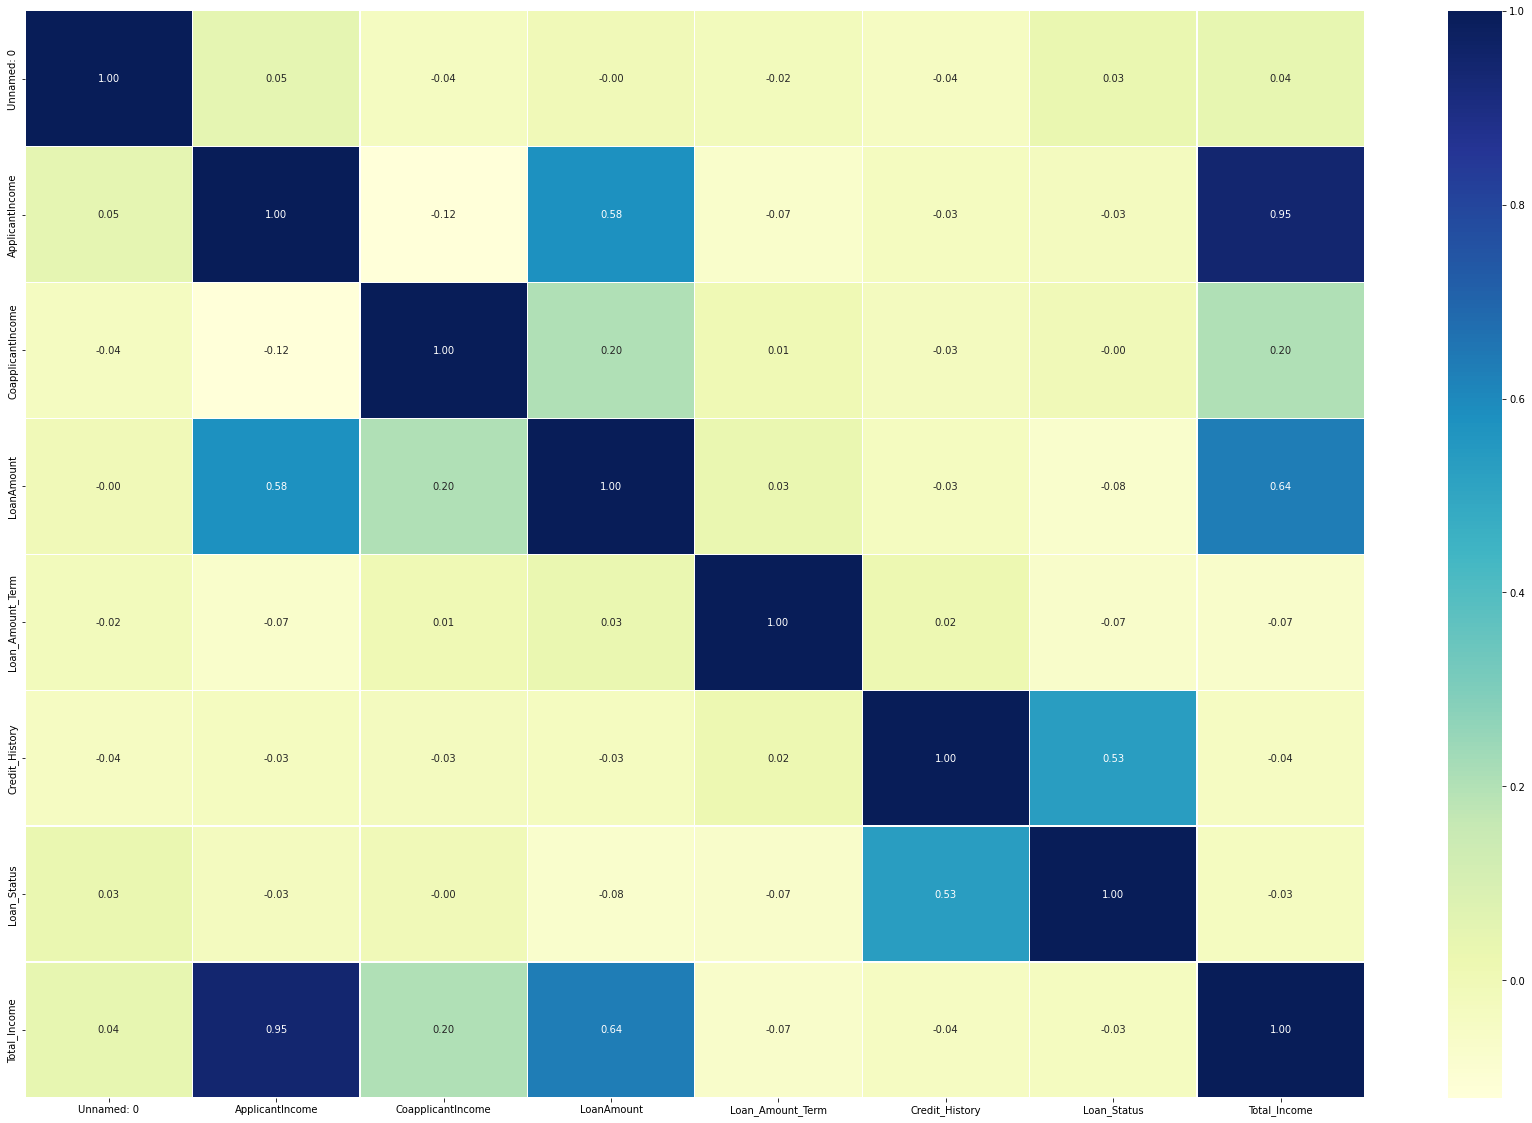

In [202]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (30, 20))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.2, fmt = ".2f", cmap = "YlGnBu")

In [203]:
data.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,5493.644000,1506.307840,144.020747,342.543210,0.843137,0.690000,6999.951840
std,144.481833,6515.668972,2134.432188,80.846099,62.933126,0.348791,0.462956,6605.759256
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,1442.000000
25%,124.750000,2874.500000,0.000000,100.000000,360.000000,1.000000,0.000000,4166.000000
50%,249.500000,3854.000000,1125.500000,128.000000,360.000000,1.000000,1.000000,5332.500000
75%,374.250000,5764.000000,2253.250000,160.000000,360.000000,1.000000,1.000000,7495.250000
max,499.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,1.000000,81000.000000


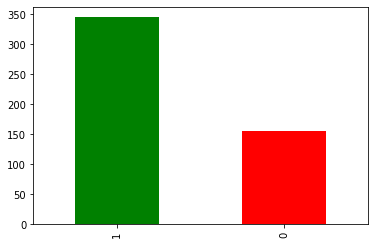

In [205]:
data["Loan_Status"].value_counts().plot(kind = "bar", color = ["green", "red"])

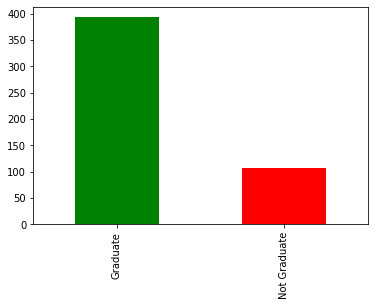

In [206]:
data["Education"].value_counts().plot(kind = "bar", color = ["green", "red"])

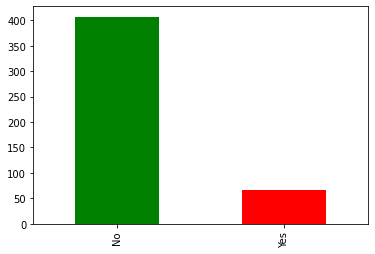

In [207]:
data["Self_Employed"].value_counts().plot(kind = "bar", color = ["green", "red"])

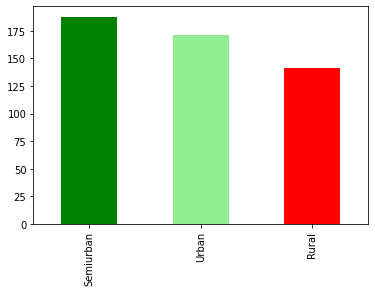

In [209]:
data["Property_Area"].value_counts().plot(kind = "bar", color = ["green","lightgreen", "red"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'ApplicantIncome')

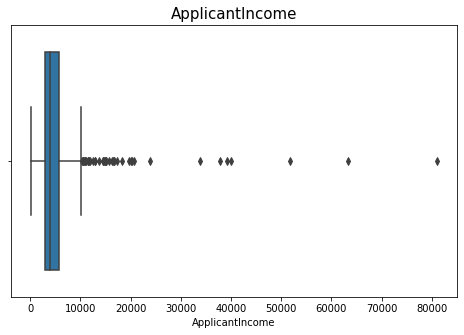

In [85]:
plt.figure(figsize=(8,5))
sns.boxplot('ApplicantIncome',data = data)
plt.title("ApplicantIncome",fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CoapplicantIncome')

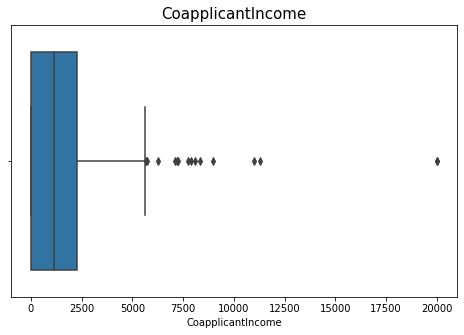

In [86]:
plt.figure(figsize=(8,5))
sns.boxplot('CoapplicantIncome',data = data)
plt.title("CoapplicantIncome",fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'LoanAmount')

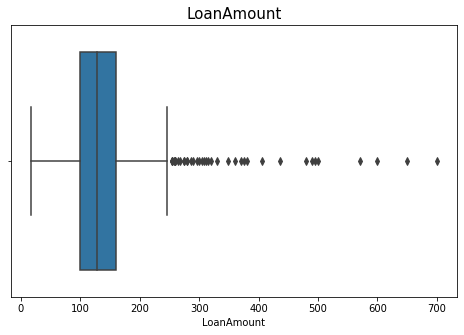

In [87]:
plt.figure(figsize=(8,5))
sns.boxplot('LoanAmount',data = data)
plt.title("LoanAmount",fontsize = 15)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,recall_score,precision_score

In [151]:
X = data[['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Credit_History', 'Loan_Amount_Term', 'Total_Income']]
y = data['Loan_Status']

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 101)

In [153]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Logistic Regression**

In [154]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [155]:
print("Accuracy:",accuracy_score(y_test, pred)*100)
print("Precision:",precision_score(y_test, pred)*100)
print("Recall:",recall_score(y_test, pred)*100)

Accuracy: 79.0
Precision: 80.24691358024691
Recall: 92.85714285714286


In [156]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[14 16]
 [ 5 65]]


In [157]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
sens = tp/(tp+fn)
spec = tn/(tn+fp)

print(f"True Positive Rate: ", 100*sens)
print(f"True Negative Rate: ", 100*spec)


True Positive Rate:  92.85714285714286
True Negative Rate:  46.666666666666664


In [159]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print('AUC: %.3f' % auc)

AUC: 0.698


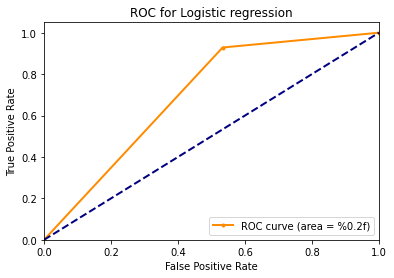

In [160]:
plt.figure()
plt.title('ROC for Logistic regression')
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# **SVM Classifiers**

In [161]:
from sklearn.svm import SVC

In [162]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [163]:
print("Accuracy:",accuracy_score(y_test, svc_pred)*100)
print("Precision:",precision_score(y_test, svc_pred)*100)
print("Recall:",recall_score(y_test, svc_pred)*100)

Accuracy: 80.0
Precision: 80.48780487804879
Recall: 94.28571428571428


In [164]:
cm = confusion_matrix(y_test, svc_pred)
print(cm)

[[14 16]
 [ 4 66]]


In [165]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, svc_pred)
auc = roc_auc_score(y_test, svc_pred)
print('AUC: %.3f' % auc)

AUC: 0.705


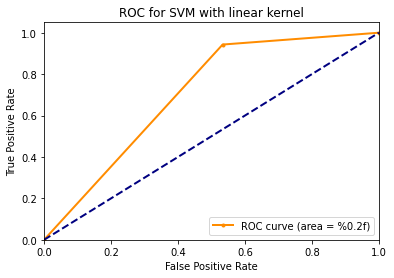

In [166]:
plt.figure()
plt.title('ROC for SVM with linear kernel')
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [167]:
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [168]:
y_pred = svclassifier.predict(X_test)

In [169]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12 18]
 [ 5 65]]
              precision    recall  f1-score   support

           0       0.71      0.40      0.51        30
           1       0.78      0.93      0.85        70

    accuracy                           0.77       100
   macro avg       0.74      0.66      0.68       100
weighted avg       0.76      0.77      0.75       100



AUC: 0.664


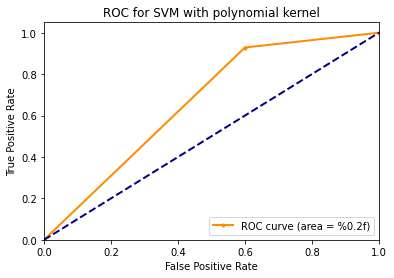

In [170]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)
plt.figure()
plt.title('ROC for SVM with polynomial kernel')
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [173]:
grid = GridSearchCV(SVC(),param_grid,verbose = 3)

In [174]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.762, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.800, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.775, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.725, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.775, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.775, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=1, gamma=0.1, score=0.738, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.825, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.875, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.775, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.750, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.775, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.825, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [175]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [176]:
grid_pred = grid.predict(X_test)

In [177]:
print("Accuracy:",accuracy_score(y_test, grid_pred)*100)
print("Precision:",precision_score(y_test, grid_pred)*100)
print("Recall:",recall_score(y_test, grid_pred)*100)

Accuracy: 81.0
Precision: 80.72289156626506
Recall: 95.71428571428572


In [178]:
print(confusion_matrix(y_test, grid_pred))
print(classification_report(y_test, grid_pred))

[[14 16]
 [ 3 67]]
              precision    recall  f1-score   support

           0       0.82      0.47      0.60        30
           1       0.81      0.96      0.88        70

    accuracy                           0.81       100
   macro avg       0.82      0.71      0.74       100
weighted avg       0.81      0.81      0.79       100



AUC: 0.712


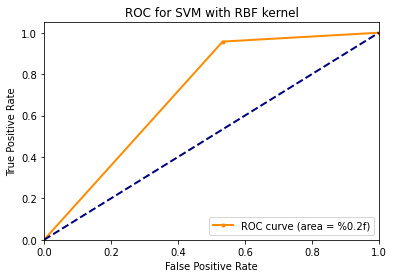

In [179]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, grid_pred)
auc = roc_auc_score(y_test, grid_pred)
print('AUC: %.3f' % auc)
plt.figure()
plt.title('ROC for SVM with RBF kernel')
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.7

In [181]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

[Text(418.5, 475.65000000000003, 'X[3] <= -1.253\ngini = 0.43\nsamples = 400\nvalue = [125, 275]'),
 Text(209.25, 339.75, 'X[0] <= -0.432\ngini = 0.103\nsamples = 55\nvalue = [52, 3]'),
 Text(104.625, 203.85000000000002, 'X[1] <= 0.12\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(313.875, 203.85000000000002, 'X[5] <= -0.308\ngini = 0.043\nsamples = 45\nvalue = [44, 1]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(627.75, 339.75, 'X[2] <= 0.15\ngini = 0.334\nsamples = 345\nvalue = [73, 272]'),
 Text(523.125, 203.85000000000002, 'X[5] <= -0.673\ngini = 0.278\nsamples = 252\nvalue = [42, 210]'),
 Text(470.8125, 67.94999999999999, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(575.4375, 67.9499999999

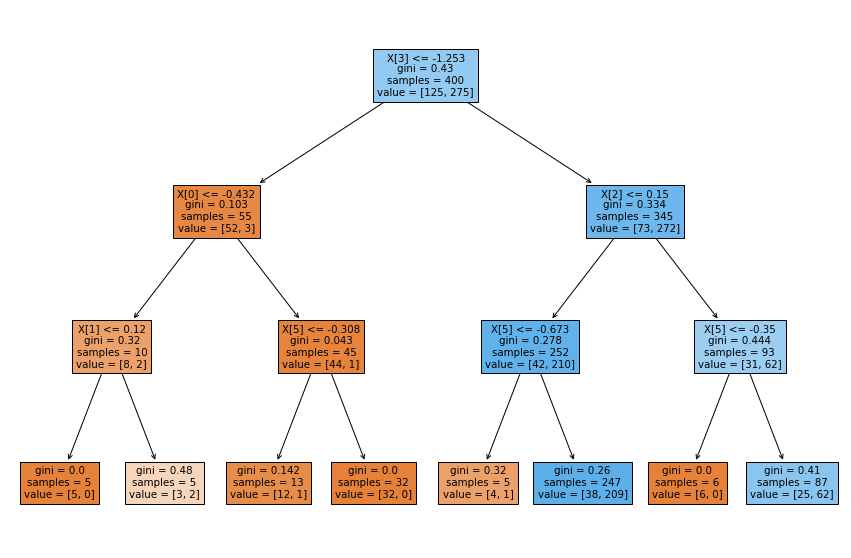

In [182]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini,filled=True)

In [183]:
y_pred = clf_gini.predict(X_test)
y_prob_preddc=clf_gini.predict_proba(X_test)
print ("Accuracy :", accuracy_score(y_test,y_pred)*100)
print("Precision:",precision_score(y_test, y_pred,average='weighted',zero_division=1))
print("Recall:",recall_score(y_test, y_pred,average='weighted',zero_division=1))

Accuracy : 80.0
Precision: 0.7925407925407925
Recall: 0.8


# **Ensemble Classifiers**

In [184]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, cross_val_predict, GridSearchCV

In [185]:
def classification(classifier):
    # Training The Model
    classifier.fit(X_train, y_train)

    # KFold Accuracies on Training Data
    kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1)
    print("K-Fold Accuracy Score:\n", kfold_accuracy, "\n")
    print("Avg K-Fold Accuracy Score:", kfold_accuracy.mean(), "\n")

    # Prediction on Testing Data
    y_pred = cross_val_predict(estimator = classifier, X = X_test, y = y_test, cv = 10, n_jobs=-1)
            
    # Accuracy for y_test and y_pred
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score:", accuracy, "\n")

    # Confusion Matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")

    # Classification Report
    print(classification_report(y_test, y_pred))

    #ROC curve
    from sklearn.metrics import roc_curve, auc, roc_auc_score

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print('AUC: %.3f' % auc)
    plt.figure()
    plt.title('ROC for {}'.format(classifier))
    plt.plot(fpr, tpr, color='darkorange',marker='.',
            lw=2, label='ROC curve (area = %0.2f)')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

K-Fold Accuracy Score:
 [0.825 0.7   0.775 0.925 0.825 0.825 0.8   0.85  0.8   0.775] 

Avg K-Fold Accuracy Score: 0.8099999999999999 

Accuracy Score: 0.75 

Confusion Matrix:
 [[13 17]
 [ 8 62]] 

              precision    recall  f1-score   support

           0       0.62      0.43      0.51        30
           1       0.78      0.89      0.83        70

    accuracy                           0.75       100
   macro avg       0.70      0.66      0.67       100
weighted avg       0.74      0.75      0.74       100

AUC: 0.660


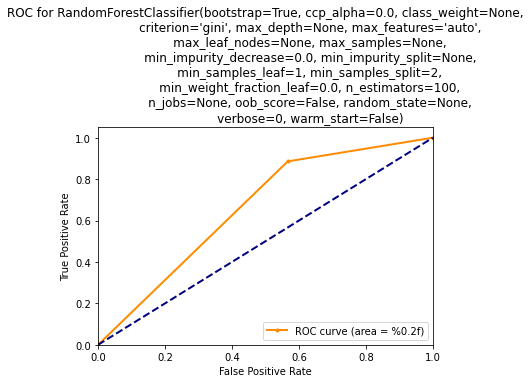

In [186]:
rf_clf = ensemble.RandomForestClassifier()
classification(rf_clf)

K-Fold Accuracy Score:
 [0.8   0.725 0.675 0.825 0.775 0.825 0.85  0.775 0.7   0.825] 

Avg K-Fold Accuracy Score: 0.7775000000000001 

Accuracy Score: 0.72 

Confusion Matrix:
 [[16 14]
 [14 56]] 

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        30
           1       0.80      0.80      0.80        70

    accuracy                           0.72       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.72      0.72      0.72       100

AUC: 0.667


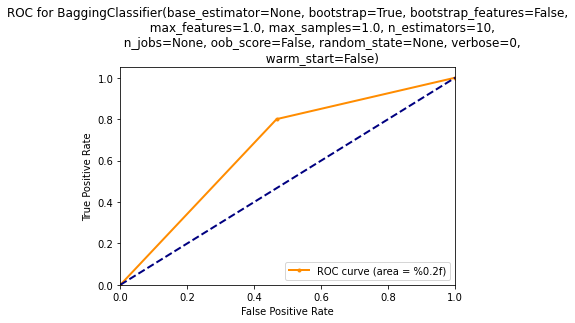

In [187]:
bag_clf = ensemble.BaggingClassifier()
classification(bag_clf)

K-Fold Accuracy Score:
 [0.8   0.75  0.775 0.825 0.825 0.85  0.8   0.775 0.8   0.775] 

Avg K-Fold Accuracy Score: 0.7975000000000001 

Accuracy Score: 0.7 

Confusion Matrix:
 [[12 18]
 [12 58]] 

              precision    recall  f1-score   support

           0       0.50      0.40      0.44        30
           1       0.76      0.83      0.79        70

    accuracy                           0.70       100
   macro avg       0.63      0.61      0.62       100
weighted avg       0.68      0.70      0.69       100

AUC: 0.614


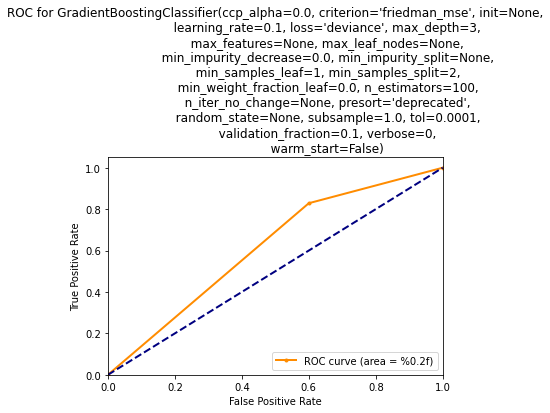

In [188]:
grad_boost_clf=ensemble.GradientBoostingClassifier()
classification(grad_boost_clf)

# **Conclusion**

In [210]:
d = {'lr_accuracy': 79., 'svm_linear_accuracy': 80.0, 'svm_poly_accuracy': 77.0,'svm_rbf_accuracy':81.0,'ensemble_rf_accuracy':75.0,'ensemble_bagging_accuracy':72.0,'ensemble_gradBoost_accuracy':70.0,'decision_tree':80.0}
ser = pd.Series(data=d, index=['lr_accuracy', 'svm_linear_accuracy','svm_poly_accuracy','svm_rbf_accuracy','ensemble_rf_accuracy','ensemble_bagging_accuracy','ensemble_gradBoost_accuracy','decision_tree']).sort_values(ascending=False)

Text(0.5, 1.0, 'Conclusion')

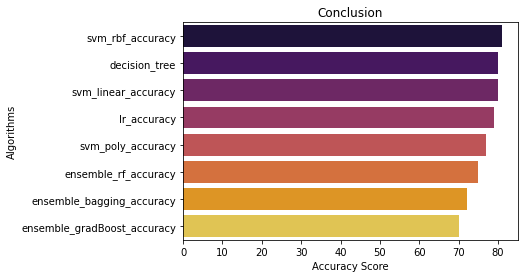

In [211]:
sns.barplot(x=ser, y=ser.index, palette = 'inferno')
plt.xlabel('Accuracy Score')
plt.ylabel('Algorithms')
plt.title("Conclusion")